读取当日时间格式n1 2018-02-04
读取当日时间格式n2 20180204
读取前一日时间格式n3 2018-02-03
读取当日时间格式n4 201824
读取当日时间格式n5 2018-02-04T07:04:42.931315
手动设定选股开始时间格式n8 20180202
手动设定选股结束时间格式n9 20180202
手动设定数据更新设定起始时间格式n10 20170101
设定股票代码 000001.XSHG
打印 开盘 最高 最低 收盘 成交量 3419.22 3463.16 3388.86 3462.08 208120551.0
当天涨幅 0.004380646246859632
打印60日均线 3381.247499999998
判断收盘价是否大于60日均线 True
30日最高价 3587.03
最近30日，收盘价 Close 大于60日均线的天数 23
10日均线上穿 False
最近10天收阳线的天数 6
最近60天K线实体的最高价 3563.64
5日均线上穿10日均线 False


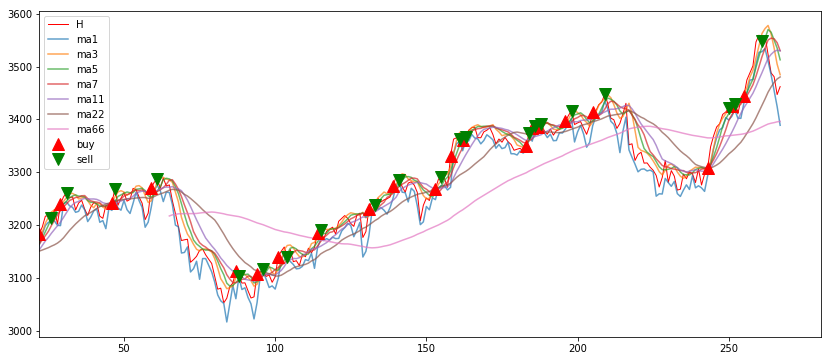

77.80144980759322 81.17679998349729 71.05074945578508


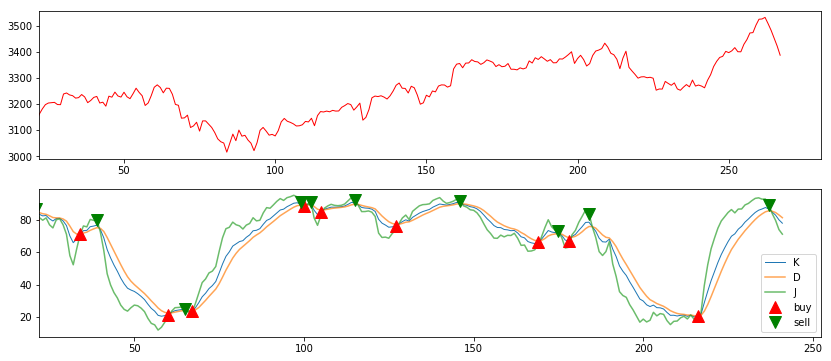

135.57040000000097 124.57762000000034


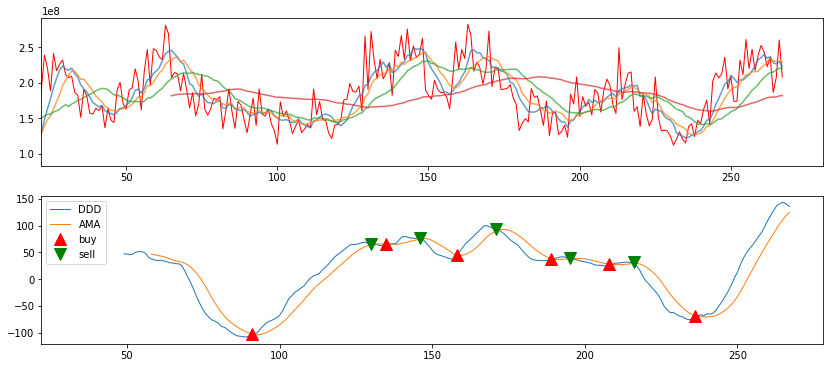

-74.96476964046275 -99.39396130026716 -173.7574668858293


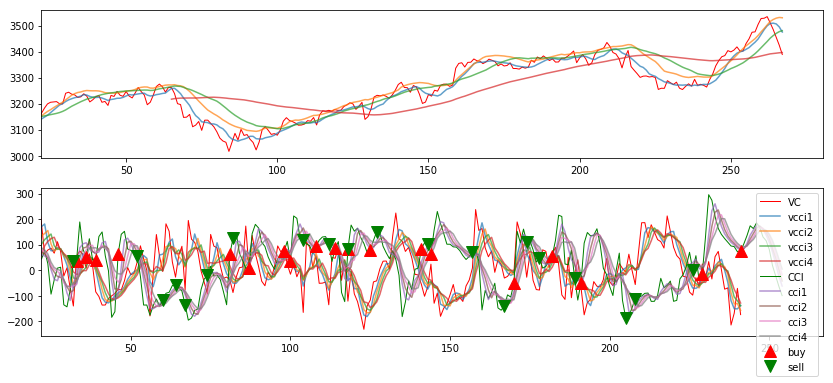

In [1]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
import tushare as ts
np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)

#扩展MOD
from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
from pytdx import * #通达信数据更新模块到QUANTAXIS的mongoDB
from tushare import * #TUSHARE数据连接更新。
from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
#from jaqs import * #QunatOS的jaqs客户端在线。
#from abupy import * #ABUPY本地化，数据在线下载更新，数据在线下载在根目录abu下
#from quantaxis import * #加载QUANTAXIS数据库模块，首先需要开启mongoDB+web服务器，数据更新通过通达信服务器。
#from hikyuu import * #HIKYUU本地化，数据库在根目录的stock。通过通达信导入。

#读取/设定数据库时间区域，当前股票，选股时间段。 
import time
import datetime
n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
print ("读取当日时间格式n1",n1) #当日时间格式：yyyy-mm-dd
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
print ("读取当日时间格式n2",n2) #当日时间格式：yyyymmdd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=1) 
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前一天日期
print ("读取前一日时间格式n3",n3) #前日时间格式：yyyy-mm-dd
i = datetime.datetime.now()#当前日期
n4 = ("%s%s%s" % (i.year, i.month, i.day) )
print ("读取当日时间格式n4",n4) #当日时间格式：yyyymmdd
n5 = ("%s" % i.isoformat() )
print ("读取当日时间格式n5",n5) #当日时间格式：yyyy-mm-dd:...
n8="20180202"#开始时间
print ("手动设定选股开始时间格式n8",n8)
n9="20180202"#结束时间
print ("手动设定选股结束时间格式n9",n9)
n10="20170101"#设定起始时间
print ("手动设定数据更新设定起始时间格式n10",n10)
x1="000001.XSHG"
print ("设定股票代码",x1)

#设定数据库连接：RQALPHA/TUSHARE
from funcat.data.tushare_backend import TushareDataBackend
#from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "tushare"
if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend("~/.rqalpha/bundle"))
elif backend == "tushare":
    set_data_backend(TushareDataBackend())
set_start_date(n10)

#当前股票最新数据显示。
S(x1)  # 设置当前关注股票
T(n9)   # 设置当前观察日期

print ("打印 开盘 最高 最低 收盘 成交量",O, H, L, C, V)  # 打印 Open High Low Close
print ("当天涨幅",C / C[1] - 1)  # 当天涨幅
print ("打印60日均线",MA(C, 60))  # 打印60日均线
print ("判断收盘价是否大于60日均线",C > MA(C, 60))  # 判断收盘价是否大于60日均线
print ("30日最高价",HHV(H, 30))  # 30日最高价
print ("最近30日，收盘价 Close 大于60日均线的天数",COUNT(C > MA(C, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("10日均线上穿",CROSS(MA(C, 10), MA(C, 20)))  # 10日均线上穿
print ("最近10天收阳线的天数",COUNT(C > O, 10))  # 最近10天收阳线的天数
print ("最近60天K线实体的最高价",HHV(MAX(O, C), 60))  # 最近60天K线实体的最高价
print ("5日均线上穿10日均线",CROSS(MA(C, 5), MA(C, 10)))  # 5日均线上穿10日均线

#当前股票价格均线+买卖
ax = plt.subplot()
ma1 = MA(L,1)
ma3 = MA(H,3)
ma5 = MA(H,5)
ma7 = MA(H,7)
ma11 = MA(H,11)
ma22 = MA(H,22)
ma66 = MA(H,66)
buy_signal = CROSS(ma1, ma7)
sell_signal = CROSS(ma7, ma1)
plt.plot(C.series, label="H", linewidth=1,color="red")
plt.plot(ma1.series, label="ma1", alpha=0.7)
plt.plot(ma3.series, label="ma3", alpha=0.7)
plt.plot(ma5.series, label="ma5", alpha=0.7)
plt.plot(ma7.series, label="ma7", alpha=0.7)
plt.plot(ma11.series, label="ma11", alpha=0.7)
plt.plot(ma22.series, label="ma22", alpha=0.7)
plt.plot(ma66.series, label="ma66", alpha=0.7)
ax.set_xlim(22)
plt.plot(np.where(buy_signal.series)[0], C.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], C.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#当前股票价格均线+KDJ显示图及买卖
N, M1, M2 = 27, 9, 3
RSV = (CLOSE - LLV(LOW, N)) / (HHV(HIGH, N) - LLV(LOW, N)) * 100
K = EMA(RSV, (M1 * 2 - 1))
D = EMA(K, (M2 * 2 - 1))
J = K * 3 - D * 2
print(K, D, J)
f, (ax1, ax2,) = plt.subplots(2, 1)
ax1.plot(L.series, label="L", linewidth=1,color="red")
#ax1.plot(MA(L, 7).series, label="ma7", alpha=0.7)
#ax1.plot(MA(H, 11).series, label="ma11", alpha=0.7)
#ax1.plot(MA(H, 22).series, label="ma22", alpha=0.7)
#ax1.plot(MA(H, 66).series, label="ma66", alpha=0.7)
ax1.set_xlim(22)
ax2.plot(K.series, label="K", linewidth=1)
ax2.plot(D.series, label="D", alpha=0.7)
ax2.plot(J.series, label="J", alpha=0.7)
ax2.set_xlim(22)
buy_signal = CROSS(J, K)
sell_signal = CROSS(K, J)
plt.plot(np.where(buy_signal.series)[0], K.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], J.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()


#当前股票成交量均线+DMA指标+买卖
#又叫平行线差指标，是目前股市分析技术指标中的一种中短期指标，它常用于大盘指数和个股的研判。
M1 = 10
M2 = 50
M3 = 10
DDD = MA(CLOSE, M1) - MA(CLOSE, M2)
AMA = MA(DDD, M3)
print(DDD, AMA)
f, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(V.series, label="V", linewidth=1,color="red")
ax1.plot(MA(V, 7).series, label="ma7", alpha=0.7)
ax1.plot(MA(V, 11).series, label="ma11", alpha=0.7)
ax1.plot(MA(V, 22).series, label="ma22", alpha=0.7)
ax1.plot(MA(V, 66).series, label="ma66", alpha=0.7)
ax1.set_xlim(22)
ax2.plot(DDD.series, label="DDD", linewidth=1)
ax2.plot(AMA.series, label="AMA", linewidth=1)
ax2.set_xlim(22)
buy_signal = CROSS(DDD, AMA)
sell_signal = CROSS(AMA, DDD)
plt.plot(np.where(buy_signal.series)[0], AMA.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], DDD.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

#CCI指标 方差函数模块
def AVEDEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)    
    return sum_/N
M=14
TYP = (H+L+C)/3
CCI = (TYP-MA(TYP,M))/(0.015*AVEDEV(TYP,M))
VCCI = (V-MA(V,M))/(0.015*AVEDEV(V,M))
VC = ((CCI+VCCI)-MA((CCI+VCCI),M))/(0.015*AVEDEV((CCI+VCCI),M))
print (VCCI,CCI,VC)
f, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(L.series, label="L", linewidth=1,color="red")
ax1.plot(MA(L, 7).series, label="ma7", alpha=0.7)
ax1.plot(MA(H, 11).series, label="ma11", alpha=0.7)
ax1.plot(MA(H, 22).series, label="ma22", alpha=0.7)
ax1.plot(MA(H, 66).series, label="ma66", alpha=0.7)
ax1.set_xlim(22)
ax2.plot(VC.series, label="VC",linewidth=1,color="red")
ax2.plot(MA(VC,3).series, label="vcci1", alpha=0.7)
ax2.plot(MA(VC,4).series, label="vcci2", alpha=0.7)
ax2.plot(MA(VC,5).series, label="vcci3", alpha=0.7)
ax2.plot(MA(VC,6).series, label="vcci4", alpha=0.7)
ax2.plot(CCI.series, label="CCI",linewidth=1, color="green")
ax2.plot(MA(CCI,3).series, label="cci1", alpha=0.7)
ax2.plot(MA(CCI,4).series, label="cci2", alpha=0.7)
ax2.plot(MA(CCI,5).series, label="cci3", alpha=0.7)
ax2.plot(MA(CCI,6).series, label="cci4", alpha=0.7)
ax2.set_xlim(22)
N1=101
N2=-101
N3=101
buy_signal = CROSS(CCI or VC,N1 or N2)
sell_signal = CROSS(CCI+VC,N1+N2)
plt.plot(np.where(buy_signal.series)[0],CCI.series[np.where(buy_signal.series)[0]],"^",label="buy",markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0],CCI.series[np.where(sell_signal.series)[0]],"v",label="sell",markersize=12, color="green")
plt.legend(loc="best")
plt.show()




In [ ]:
# 选股CCI  OK!!!
select(
    lambda : CROSS(((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14))) or ((((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14))))-MA((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))/(0.015*AVEDEV((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))))

,101 or -101),start_date=(n8),end_date=(n9),)

lambda : CROSS(((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14))) or ((((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14))))-MA((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))/(0.015*AVEDEV((((((H+L+C)/3)-MA(((H+L+C)/3),14))/(0.015*AVEDEV(((H+L+C)/3),14)))+((V-MA(V,14))/(0.015*AVEDEV(V,14)))),14))))

,101 or -101),start_date=(n8),end_date=(n9),)
[20180202]
20180202 000048.XSHE 000048.XSHE[康达尔]
20180202 000898.XSHE 000898.XSHE[鞍钢股份]
20180202 000976.XSHE 000976.XSHE[华铁股份]
20180202 000989.XSHE 000989.XSHE[九 芝 堂]
20180202 002128.XSHE 002128.XSHE[露天煤业]
20180202 002258.XSHE 002258.XSHE[利尔化学]
20180202 002319.XSHE 002319.XSHE[乐通股份]
20180202 002359.XSHE 002359.XSHE[北讯集团]
20180202 002601.XSHE 002601.XSHE[龙蟒佰利]
20180202 002699.XSHE 002699.XSHE[美盛文化]
20180202 002847.XSHE 002847.XSHE[盐津铺子]
20180202 600028.XSHG 600028.XSHG[中国石化]
20180202 600048.XSHG 600048.XSHG[保利地产]
2018020

In [ ]:
# KDJ选股 ok！！！
select(
    lambda : CROSS((EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1))) * 3 - (EMA(EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1)), (M2 * 2 - 1))) * 2, (EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1))))

,
    start_date=(n8),
	end_date=(n9),
)

In [5]:
#新指标


#def CCC(M1 =[1&2&3&5&7&9&11&13&15&17&19]):
#def CCC(M1 =[1,2,3,5,7,9,11,13,15,17,19]):
#def CCC(M1 =len([1*2*3*5*7*9*11*13*15*17*19])):
#def CCC(M1 = (list(range(1, 22)))) :
#def CCC(M1=[x * x for x in range(1, 11)]):
def CCI(M1=14):    
    CCC = (((REF(HIGH,M1) + REF(LOW,M1) + REF(CLOSE,M1)
      )/3.14159265)-MA(((REF(HIGH,M1) + REF(LOW,M1) + REF(CLOSE,M1)
        )/3.14159265),M1))/(0.618*AVEDEV(((REF(HIGH,M1) + REF(LOW,M1
         ) + REF(CLOSE,M1))/3.14159265),M1))
    return CCC
    
def AVEDEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)
    
    return sum_/N
    
def AVE_DEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    AVE = ABS(value-mean)
    for i in range(1,N):
        AVE += ABS(REF(value,i)-mean)

    return AVE/N


select(
    lambda :
    (((REF(HIGH,2) + REF(LOW,2) + REF(CLOSE,2))/3.14159265)-MA(((REF(HIGH,2) + REF(LOW,2) + REF(CLOSE,2))
    /3.14159265),2))/(0.618*AVEDEV(((REF(HIGH,2) + REF(LOW,2) + REF(CLOSE,2))/3.14159265),2)) > 100 ,
    
    start_date=(n8),
    end_date=(n9),
)



lambda :
[20180202]
20180202 000977.XSHE 000977.XSHE[浪潮信息]
20180202 600415.XSHG 600415.XSHG[小商品城]
20180202 600743.XSHG 600743.XSHG[华远地产]
20180202 601000.XSHG 601000.XSHG[唐山港]
20180202 603316.XSHG 603316.XSHG[诚邦股份]



In [2]:
from pandas import Series, DataFrame
import pandas as pd

def AVEDEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)
    return sum_/N
def AVE_DEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    AVE = ABS(value-mean)
    for i in range(1,N):
        AVE += ABS(REF(value,i)-mean)
    return AVE/N

M=2

#M1 =[1&2&3&5&7&9&11&13&15&17&19]
#M1 =[1,2,3,5,7,9,11,13,15,17,19]
#M1 =len([1*2*3*5*7*9*11*13*15*17*19])
#M1 = list(range(1, 11))
#M1 = [x * x for x in range(1, 11)]
#dM1=14
TYPI = (HIGH+LOW+CLOSE)/3
CCI = (TYPI-MA(TYPI,M))/(0.015*AVEDEV(TYPI,M))

TYP = (REF(HIGH,M)+REF(LOW,M)+REF(CLOSE,M)+REF(VOL,M))/3.14159265  
CCC = (TYP-MA(TYP,M))/(0.618*AVEDEV(TYP,M))
TYP1 = (REF(V,M)+REF(V,M)+REF(V,M)+REF(V,M))/3.14159265  
DDD = (CCC*CCC*CCC)/CCI
#CCC = (((REF(HIGH,M1) + REF(LOW,M1) + REF(CLOSE,M1))/3.14159265)-MA(((REF(HIGH,M1) + REF(LOW,M1) + REF(CLOSE,M1))/3.14159265),M1))/(0.618*AVEDEV(((REF(HIGH,M1) + REF(LOW,M1) + REF(CLOSE,M1))/3.14159265),M1))
X = (V*L)/(0.015*AVEDEV(X*L,M))
print (CCI,CCC,DDD,X)
f, (ax1,ax2) = plt.subplots(2,1)
#ax = plt.subplot()
ax2.plot(H.series, label="H",linewidth=1)
ax1.plot(X.series, label="X",linewidth=1)
#ax2.plot(CCC.series, label="CCC",linewidth=1)
#ax2.plot(DDD.series, label="DDD",linewidth=1)
plt.legend(loc="best")
plt.show()

NameError: name 'X' is not defined

In [7]:
#CCI 指标

def CCI(M1=14):
    TYP = (HIGH+LOW+CLOSE)/3
    CCI = (TYP-MA(TYP,M1))/(0.015*AVEDEV(TYP,M1))
    return CCI
    
def AVEDEV(value,N):
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)
    
    return sum_/N
'''	
def AVEDEV(value,N):
	mean = value/N
	for i in range(1,N):
		mean += REF(value,i)/N
	AVE = ABS(value-mean)
	for i in range(1,N):
	    AVE += ABS(REF(value,i)-mean)
	
	return AVE/N
'''

select(
    lambda : (((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14159265)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14159265),1))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14159265),1)) >= 100,
    start_date=(n8),
	end_date=(n9),
)




lambda : (((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14159265)-MA(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14159265),1))/(0.618*AVEDEV(((REF(HIGH,1) + REF(LOW,1) + REF(CLOSE,1))/3.14159265),1)) >= 100,
[20180201]
No data for 603516.XSHG



In [ ]:
'''
    TYP = ((REF(HIGH,M1) + REF(LOW,M1) + REF(CLOSE,M1))/3.14159265)    
    CCC1 = (TYP-MA(TYP,1))/(0.618*avedev(TYP,1))
    CCC2 = (TYP-MA(TYP,2))/(0.618*AVEDEV(TYP,2))
    CCC3 = (TYP-MA(TYP,3))/(0.618*ABS(TYP,3))
    CCC4 = (TYP-MA(TYP,5))/(0.618*ABS(TYP,5))
    CCC5 = (TYP-MA(TYP,7))/(0.618*ABS(TYP,7))
    CCC6 = (TYP-MA(TYP,9))/(0.618*ABS(TYP,9))
    CCC7 = (TYP-MA(TYP,11))/(0.618*ABS(TYP,11))
    CCC8 = (TYP-MA(TYP,13))/(0.618*ABS(TYP,13))
    CCC9 = (TYP-MA(TYP,15))/(0.618*ABS(TYP,15))
    CCC10 = (TYP-MA(TYP,17))/(0.618*ABS(TYP,17))
    CCC11 = (TYP-MA(TYP,19))/(0.618*ABS(TYP,19))
    MAMTM = (MA((MA(CLOSE-REF(CLOSE,12),6)),6))

    #cccx = range(ccc2,0,2) & range(ccc3,0,3) & CROSS(ccc5,0) & CROSS(ccc6,0) & CROSS(ccc7,0) & CROSS(ccc8,0) & CROSS(ccc9,0) & CROSS(ccc10,0) & CROSS(ccc11,0) 
    #cccB = range(ccc2,0,2) & range(ccc3,0,3) & CROSS(ccc5,-1) & CROSS(ccc6,-1) & CROSS(ccc7,-1) & CROSS(ccc8,-1) & CROSS(ccc9,-1) & CROSS(ccc10,-1) & CROSS(ccc11,-1))) & CROSS((ATAN((REF(MA(CLOSE,12),1)/REF(MA(CLOSE,12),2)-1)*100)*75.3),35) & (REF(VOL,1)/REF(MA(VOL,3),2))>1.618 & REF(CLOSE,2)/REF(OPEN,1)<1.0618 & REF(CLOSE,2)/REF(CLOSE,1)<1.099 & OPEN/REF(CLOSE,1)<1.0618
''' 


select(
    lambda : CCC / CCI[1] - 1 >= 0.0995,
    start_date=(n8),
	end_date=(n9),
)



In [ ]:
# 选出涨停股
select(
    lambda : C / C[1] - 1 >= 0.0995,
    start_date=(n8),
	end_date=(n9),
)

# 选出最近30天K线实体最高价最低价差7%以内，最近100天K线实体最高价最低价差25%以内，
# 最近10天，收盘价大于60日均线的天数大于3天
select(
    lambda : ((HHV(MAX(C, O), 30) / LLV(MIN(C, O), 30) - 1 < 0.07)
              & (HHV(MAX(C, O), 100) / LLV(MIN(C, O), 100) - 1 > 0.25)
              & (COUNT(C > MA(C, 60), 10) > 3)
             ),
    start_date=(n8),
	end_date=(n9),
)

# 选出最近3天每天的成交量小于20日成交量均线，最近3天最低价低于20日均线，最高价高于20日均线
# 自定义选股回调函数
def callback(date, order_book_id, symbol):
    print("Cool, 在", date, "选出", order_book_id, symbol)

    
select(
    lambda : (EVERY(V < MA(V, 20) / 2, 3) & EVERY(L < MA(C, 20), 3) & EVERY(H > MA(C, 20), 3)),
    start_date=(n8),
	end_date=(n9),
    callback=callback,
)

lambda : C / C[1] - 1 >= 0.0995,
[20180202]
20180202 000672.XSHE 000672.XSHE[上峰水泥]


In [27]:
#N, M1, M2 = 27, 9, 3
#RSV = (CLOSE - LLV(LOW, N)) / (HHV(HIGH, N) - LLV(LOW, N)) * 100
#K = EMA(RSV, (M1 * 2 - 1))
#D = EMA(K, (M2 * 2 - 1))
#J = K * 3 - D * 2

RSV = ((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100)
K = (EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1)))
D = (EMA(EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1)), (M2 * 2 - 1)))
J = (EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1))) * 3 - (EMA(EMA(((CLOSE - LLV(LOW, 27)) / (HHV(HIGH, 27) - LLV(LOW, 27)) * 100), (M1 * 2 - 1)), (M2 * 2 - 1))) * 2

print(RSV,K, D, J)

kdj = CROSS(J, K)

print (kdj)


46.34146341463411 51.738414554404834 49.43749148893567 56.340260685343154
False


In [3]:
# 选出kdj
select(
    lambda : kdj,
    start_date=(n8),
	end_date=(n9),
)

NameError: name 'select' is not defined

In [3]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)
from funcat import *
import tushare as ts
#from funcat.data.tushare_backend import TushareDataBackend
#from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
#backend = "rqalpha"
#if backend == "rqalpha":
#   set_data_backend(RQAlphaDataBackend("~/.rqalpha/bundle"))
#elif backend == "tushare":
#    set_data_backend(TushareDataBackend())
set_start_date(20180101)

select(
    lambda : C  >= 100,
    start_date=(20180201),
	end_date=(20180202),
)

lambda : C  >= 100,
[20180202]
20180202 000661.XSHE 000661.XSHE[长春高新]
20180202 002304.XSHE 002304.XSHE[洋河股份]
20180202 002912.XSHE 002912.XSHE[中新赛克]
20180202 600519.XSHG 600519.XSHG[贵州茅台]


KeyboardInterrupt: 